# Regression Worksheet


1. Use the Boston Housing dataset to perform the following tasks:
    
    a. Create a training and test subsets of the dataset.
    
    b. Create multiple linear regression model with just RM and LSTAT, to predict housing price, and apply it to the test set. Assess the RMSE error.
    
    c. Plot the residuals from the model and assess if they are suitable.
    
    d. Go back and try different alternative models:
        * Add new features to improve your prediction of housing price.
        * Try scaling your features using a pipeline
        * Try a LASSO model instead, with different regularisation strengths.

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn import metrics, datasets, preprocessing
from sklearn.model_selection import StratifiedShuffleSplit,ShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union


import scipy.stats as stats
import math

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_regression, RFE, SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, datasets

In [293]:
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [294]:
print ('Keys:', boston.keys())
print ('Feature names:',boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [295]:
indexes = [5, 12]
df2 = pd.DataFrame(boston.data[:,indexes],columns = boston.feature_names[indexes])
df2['PRICE'] = boston.target

In [296]:
X_boston2 = df2.loc[:, ['RM', 'LSTAT']].values
X_boston2

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [297]:
ss =ShuffleSplit(n_splits = 1, test_size = 0.25, 
                             random_state = 42)
ss.get_n_splits(X_boston, y_boston)
for train_index, test_index in ss.split(X_boston, y_boston):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_all_variable, X_test_all_variable = X_boston[train_index], X_boston[test_index]
    y_train, y_test = y_boston[train_index], y_boston[test_index]
# If the y is catogorizing variable, then change the ShuffleSplit into StratifiedShuffleSplit.

TRAIN: [182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211 404
  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60 110
 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272 144
 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109 420
 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284 302
 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111  89
 266   6 364 503 341 158 150 177 397 184 318  10 384 103  81  38 317 167
 475 299 296 198 377 146 396 147 428 289 123 490  96 143 239 275  97 353
 122 183 202 246 484 301 354 410 399 286 125 305 223 422 219 129 424 291
 331 380 480 358 297 294 370 438 112 179 310 342 333 487 457 233 314 164
 136 197 258 232 115 120 352 224 406 340 127 285 415 107 374 449 133 367
  44 495  65 283  85 242 186 425 159  12  35  28 170 142 402 349 221  95
  51 240 376 382 178  41 440 391 206 282 254 416   4 256 453 100 226 431
 213 426 171  98 292 215  61  47  32 267 327

In [298]:
ss =ShuffleSplit(n_splits = 1, test_size = 0.25, 
                             random_state = 42)
ss.get_n_splits(X_boston2, y_boston)
for train_index, test_index in ss.split(X_boston2, y_boston):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_boston2[train_index], X_boston2[test_index]
    y_train, y_test = y_boston[train_index], y_boston[test_index]
# If the y is catogorizing variable, then change the ShuffleSplit into StratifiedShuffleSplit.

TRAIN: [182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211 404
  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60 110
 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272 144
 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109 420
 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284 302
 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111  89
 266   6 364 503 341 158 150 177 397 184 318  10 384 103  81  38 317 167
 475 299 296 198 377 146 396 147 428 289 123 490  96 143 239 275  97 353
 122 183 202 246 484 301 354 410 399 286 125 305 223 422 219 129 424 291
 331 380 480 358 297 294 370 438 112 179 310 342 333 487 457 233 314 164
 136 197 258 232 115 120 352 224 406 340 127 285 415 107 374 449 133 367
  44 495  65 283  85 242 186 425 159  12  35  28 170 142 402 349 221  95
  51 240 376 382 178  41 440 391 206 282 254 416   4 256 453 100 226 431
 213 426 171  98 292 215  61  47  32 267 327

In [299]:
# training set regression with just RM and LSTAT
bos1=LinearRegression()
bos1.fit(X_train, y_train)
y_hat_train = bos1.predict(X_train)

In [300]:
r2 = metrics.r2_score(y_train, y_hat_train)
mse = metrics.mean_squared_error(y_train, y_hat_train)
rmse = math.sqrt(mse)
print('The RMSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(rmse, r2))

The RMSE and R2 are 5.557 and 0.652 respectively.


In [301]:
bos1.fit(X_test, y_test)
y_hat_test = bos1.predict(X_test)
r2 = metrics.r2_score(y_test, y_hat_test)
mse = metrics.mean_squared_error(y_test, y_hat_test)
rmse = math.sqrt(mse)
print('The RMSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(rmse, r2))

The RMSE and R2 are 5.376 and 0.587 respectively.


In [302]:
poly = preprocessing.PolynomialFeatures(2)
X_train_q = poly.fit_transform(X_train)
X_train_q

array([[  1.      ,   7.155   ,   4.82    ,  51.194025,  34.4871  ,
         23.2324  ],
       [  1.      ,   6.152   ,  15.02    ,  37.847104,  92.40304 ,
        225.6004  ],
       [  1.      ,   7.82    ,   3.76    ,  61.1524  ,  29.4032  ,
         14.1376  ],
       ...,
       [  1.      ,   6.635   ,   5.99    ,  44.023225,  39.74365 ,
         35.8801  ],
       [  1.      ,   6.629   ,  23.27    ,  43.943641, 154.25683 ,
        541.4929  ],
       [  1.      ,   6.405   ,  10.63    ,  41.024025,  68.08515 ,
        112.9969  ]])

In [303]:
bos_qr = LinearRegression()
bos_qr.fit(X_train_q, y_train)
y_hat_train_q = bos_qr.predict(X_train_q)
r2 = metrics.r2_score(y_train, y_hat_train_q)
mse = metrics.mean_squared_error(y_train, y_hat_train_q)
rmse = math.sqrt(mse)
print('The RMSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(rmse, r2))

The RMSE and R2 are 4.576 and 0.764 respectively.


In [304]:
poly = preprocessing.PolynomialFeatures(2)
X_test_q = poly.fit_transform(X_test)
X_test_q

bos_qr = LinearRegression()
bos_qr.fit(X_test_q, y_test)
y_hat_test_q = bos_qr.predict(X_test_q)
r2 = metrics.r2_score(y_test, y_hat_test_q)
mse = metrics.mean_squared_error(y_test, y_hat_test_q)
rmse = math.sqrt(mse)
print('The RMSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(rmse, r2))

The RMSE and R2 are 4.158 and 0.753 respectively.


In [305]:
poly = preprocessing.PolynomialFeatures(3)
X_train_q = poly.fit_transform(X_train)
X_train_q
bos_qr = LinearRegression()
bos_qr.fit(X_train_q, y_train)
y_hat_train_q = bos_qr.predict(X_train_q)
r2 = metrics.r2_score(y_train, y_hat_train_q)
mse = metrics.mean_squared_error(y_train, y_hat_train_q)
rmse = math.sqrt(mse)
print('The RMSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(rmse, r2))

The RMSE and R2 are 4.319 and 0.790 respectively.


In [306]:
poly = preprocessing.PolynomialFeatures(3)
X_test_q = poly.fit_transform(X_test)
X_test_q
bos_qr = LinearRegression()
bos_qr.fit(X_test_q, y_test)
y_hat_test_q = bos_qr.predict(X_test_q)
r2 = metrics.r2_score(y_test, y_hat_test_q)
mse = metrics.mean_squared_error(y_test, y_hat_test_q)
rmse = math.sqrt(mse)
print('The RMSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(rmse, r2))

The RMSE and R2 are 4.072 and 0.763 respectively.


In [307]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearRegression())),
  #('classification', RandomForestClassifier())
])
clf.fit(X_train_all_variable, y_train)
X_selected_train=clf.transform(X_train_all_variable)
clf.transform(X_train_all_variable)

array([[0.    , 0.488 , 7.155 ],
       [1.    , 0.871 , 6.152 ],
       [0.    , 0.4429, 7.82  ],
       ...,
       [0.    , 0.435 , 6.635 ],
       [0.    , 0.74  , 6.629 ],
       [0.    , 0.52  , 6.405 ]])

In [308]:
final_linear_mod = LinearRegression()
final_linear_mod.fit(X_train_all_variable, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [309]:
X_selected_test=clf.transform(X_test_all_variable)
clf.transform(X_test_all_variable)

array([[0.    , 0.51  , 6.416 ],
       [1.    , 0.447 , 6.758 ],
       [0.    , 0.609 , 5.983 ],
       [0.    , 0.413 , 6.065 ],
       [0.    , 0.713 , 6.297 ],
       [0.    , 0.437 , 6.279 ],
       [0.    , 0.544 , 5.914 ],
       [0.    , 0.624 , 6.174 ],
       [0.    , 0.532 , 6.229 ],
       [0.    , 0.585 , 6.027 ],
       [1.    , 0.55  , 5.951 ],
       [0.    , 0.524 , 6.004 ],
       [0.    , 0.693 , 4.519 ],
       [0.    , 0.437 , 6.232 ],
       [0.    , 0.493 , 5.708 ],
       [0.    , 0.614 , 6.98  ],
       [0.    , 0.581 , 5.879 ],
       [0.    , 0.7   , 4.88  ],
       [0.    , 0.422 , 7.875 ],
       [0.    , 0.713 , 6.185 ],
       [0.    , 0.464 , 6.24  ],
       [0.    , 0.447 , 6.482 ],
       [0.    , 0.538 , 5.713 ],
       [0.    , 0.573 , 6.593 ],
       [0.    , 0.718 , 6.006 ],
       [0.    , 0.584 , 5.427 ],
       [0.    , 0.437 , 5.874 ],
       [0.    , 0.713 , 6.728 ],
       [1.    , 0.489 , 5.96  ],
       [0.    , 0.585 , 5.794 ],
       [0.

In [310]:
final_linear_mod.fit(X_selected_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [311]:
y_hat2= final_linear_mod.predict(X_selected_test)

In [312]:
r2 = metrics.r2_score(y_test, y_hat2)
mse = metrics.mean_squared_error(y_test, y_hat2)
rmse = math.sqrt(mse)
print('The RMSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(rmse, r2))

The RMSE and R2 are 5.890 and 0.505 respectively.


In [313]:
# See all variables with LASSO.

In [314]:
lasso = linear_model.LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
lasso.fit(X_train_all_variable, y_train)
# The estimator chose automatically its lambda:
lasso.alpha_ 

0.7070114354536654

In [315]:
final_lasso_mod = Lasso(alpha = lasso.alpha_)
final_lasso_mod.fit(X_train_all_variable, y_train)

Lasso(alpha=0.7070114354536654, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [316]:
yhat = final_lasso_mod.predict(X_test_all_variable)

In [317]:
r2 = metrics.r2_score(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
rmse = math.sqrt(mse)
print('The RMSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(rmse, r2))

The RMSE and R2 are 4.853 and 0.664 respectively.


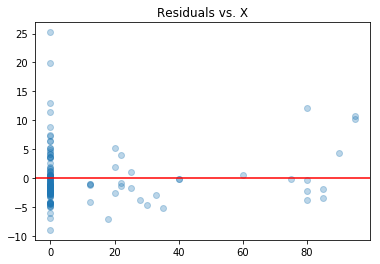

In [318]:
res = y_test - yhat
plt.scatter(X_test_all_variable[:, 1], res, alpha=0.3)
plt.title("Residuals vs. X")
plt.axhline(0, color='red')

((array([-2.5463381 , -2.21997991, -2.03230259, -1.89701519, -1.78953414,
         -1.6994643 , -1.62138714, -1.55210318, -1.4895582 , -1.43235119,
         -1.37948184, -1.33020984, -1.28397117, -1.24032572, -1.19892311,
         -1.1594796 , -1.121762  , -1.08557617, -1.05075865, -1.01717045,
         -0.98469227, -0.95322091, -0.92266645, -0.89294999, -0.86400188,
         -0.83576031, -0.80817012, -0.78118183, -0.7547509 , -0.72883702,
         -0.7034036 , -0.67841727, -0.65384749, -0.62966625, -0.60584774,
         -0.58236809, -0.55920522, -0.53633858, -0.51374902, -0.49141865,
         -0.4693307 , -0.4474694 , -0.42581991, -0.4043682 , -0.383101  ,
         -0.36200569, -0.34107027, -0.3202833 , -0.29963382, -0.27911134,
         -0.25870575, -0.23840733, -0.21820667, -0.19809468, -0.1780625 ,
         -0.15810153, -0.13820337, -0.11835978, -0.09856269, -0.07880416,
         -0.05907635, -0.03937151, -0.01968194,  0.        ,  0.01968194,
          0.03937151,  0.05907635,  0.

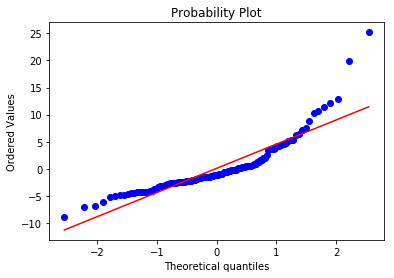

In [319]:
stats.probplot(res, dist="norm", plot=plt)

In [320]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, scoring=None,
    normalize=False)
reg.fit(X_train_all_variable, y_train)       
reg.alpha_ 

0.1

In [321]:
final2 = Lasso(alpha = reg.alpha_)
final2.fit(X_test_all_variable, y_test)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [322]:
y_hat_ri = final2.predict(X_test_all_variable)
r2 = metrics.r2_score(y_test, y_hat_ri)
mse = metrics.mean_squared_error(y_test, y_hat_ri)
rmse = math.sqrt(mse)
print('The RMSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(rmse, r2))

The RMSE and R2 are 4.325 and 0.733 respectively.


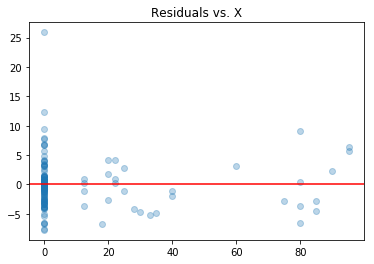

In [323]:
res = y_test - y_hat_ri
plt.scatter(X_test_all_variable[:, 1], res, alpha=0.3)
plt.title("Residuals vs. X")
plt.axhline(0, color='red')

((array([-2.5463381 , -2.21997991, -2.03230259, -1.89701519, -1.78953414,
         -1.6994643 , -1.62138714, -1.55210318, -1.4895582 , -1.43235119,
         -1.37948184, -1.33020984, -1.28397117, -1.24032572, -1.19892311,
         -1.1594796 , -1.121762  , -1.08557617, -1.05075865, -1.01717045,
         -0.98469227, -0.95322091, -0.92266645, -0.89294999, -0.86400188,
         -0.83576031, -0.80817012, -0.78118183, -0.7547509 , -0.72883702,
         -0.7034036 , -0.67841727, -0.65384749, -0.62966625, -0.60584774,
         -0.58236809, -0.55920522, -0.53633858, -0.51374902, -0.49141865,
         -0.4693307 , -0.4474694 , -0.42581991, -0.4043682 , -0.383101  ,
         -0.36200569, -0.34107027, -0.3202833 , -0.29963382, -0.27911134,
         -0.25870575, -0.23840733, -0.21820667, -0.19809468, -0.1780625 ,
         -0.15810153, -0.13820337, -0.11835978, -0.09856269, -0.07880416,
         -0.05907635, -0.03937151, -0.01968194,  0.        ,  0.01968194,
          0.03937151,  0.05907635,  0.

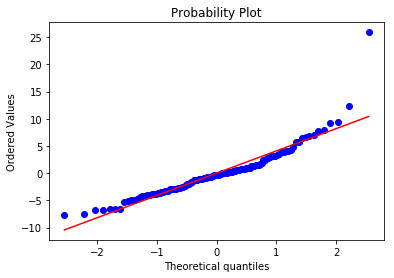

In [324]:
stats.probplot(res, dist="norm", plot=plt)

2. Use the NBA dataset to perform the following tasks:

    a. Create training and test subsets of the dataset.
    
    b. Create a logistic regression model with more than just 3-point percentage as a feature.
    
    c. Produce the confusion matrix.
    
    d. Apply one of the models we learned in topic 6 and compare the performance of the two models.
   